# Step 1: Import Dependencies



In [9]:
#STEP 1: IMPORT DEPENDENCIES
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [10]:
img_array= cv2.imread('dataset/Face_Mask/00000_Mask.jpg',1)


In [5]:
img_array.shape


(1024, 1024, 3)

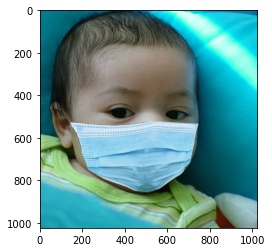

In [6]:
Datadirectory = "dataset/" ##TRAINING DATASET
Classes = [ "Face_Mask","No_Mask"] ##List of classes 
for category in Classes: 
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread (os.path.join(path,img))
        #backtogb= cv2.cvtColor(img_array,cv3.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    

# IMAGENET classifier needs 224 size


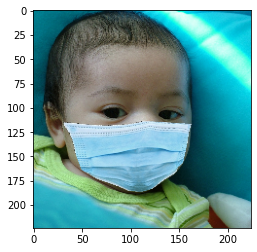

In [7]:
img_size = 224
new_array= cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

# Reading Images and converting to array because we need data and labels

In [8]:
training_Data=[] ##data

def create_training_Data():
    for category in Classes:
        path= os.path.join(Datadirectory,category)
        class_num=Classes.index(category) #0, 1 Label
        for img in os.listdir(path):
            try: 
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

1950


# Before training use shuffle for images and better training

In [11]:
import random

random.shuffle(training_Data)

In [12]:
X = [] #DATA 

y = [] #LABEL

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape #RGB CHANNEL 

(1950, 224, 224, 3)

In [14]:
#NORMALIZE THE DATA 

X=X/255.0; #WE can also use SK learn Package but we not

In [15]:
y[1000]



0

In [16]:
Y=np.array(y)

In [17]:
import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)

pickle_out.close()

In [18]:
pickle_in= open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


 # Deep Learning Model for Training - Transfer Learning

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet() #MobileNET is lightweight and pretrained Model 


In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

 # Transfer Learning- Tuning, weights will start from last checkpoint

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) #0 ,1 
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs= base_input, outputs= final_output )

In [26]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

 # Settings for binary classification (Face Mask/ without Mask) 

In [27]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [28]:
new_model.fit(X,Y,epochs= 1, validation_split= 0.1)

55/55 [==============================] - 352s 6s/step - loss: 0.0787 - accuracy: 0.9528 - val_loss: 0.0251 - val_accuracy: 0.9949


In [29]:
# To freeze layers
# for layer in model.layer:
    # layer[].trainable = false 
#to free only first layer 


In [73]:
new_model.save('my_model3.h5')

In [72]:
new_model = tf.keras.models.load_model('my_model3.h5') 

# Checking the network for Predictions

In [32]:
frame = cv2.imread('00010_Mask.jpg')

In [33]:
frame.shape

(1024, 1024, 3)

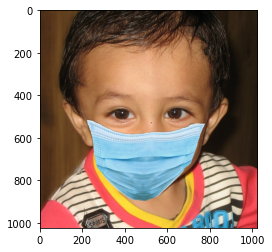

In [34]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [35]:
final_image= cv2.resize(frame , (224,224))
final_image= np.expand_dims(final_image,axis=0) ## Need a fourth dimension
final_image=final_image/255.0 #normalizing


In [36]:
Predictions = new_model.predict(final_image)

In [37]:
Predictions

array([[2.9213254e-10]], dtype=float32)

# Check for image from google : 

In [38]:
frame = cv2.imread('sadman.jpg')

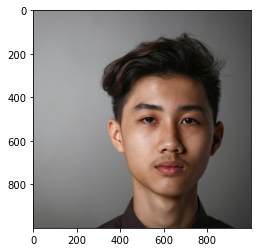

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [40]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [41]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape


(1000, 1000)

In [42]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w , y+h), (255,0,0), 2 ) 
    faces= faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face Not Detected")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

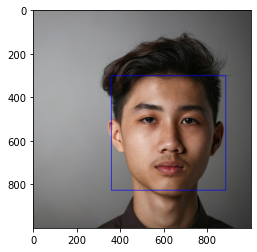

In [43]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

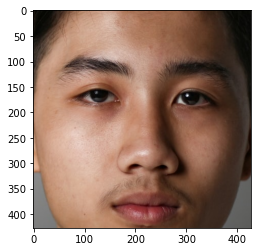

In [44]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [45]:
final_image= cv2.resize(frame , (224,224))
final_image= np.expand_dims(final_image,axis=0) ## Need a fourth dimension
final_image=final_image/255.0 #normalizing


In [46]:
Predictions = new_model.predict(final_image)

In [47]:
Predictions 

array([[1.]], dtype=float32)

# REAL TIME DEMO : 

In [1]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image
import cv2
import datetime

In [2]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


C:\Users\Sanjana\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
83/83 [==============================] - 80s 919ms/step - loss: 0.5908 - accuracy: 0.6831 - val_loss: 0.1950 - val_accuracy: 0.9072
Epoch 2/10
83/83 [==============================] - 46s 559ms/step - loss: 0.1451 - accuracy: 0.9518 - val_loss: 0.1370 - val_accuracy: 0.9536
Epoch 3/10
83/83 [==============================] - 50s 605ms/step - loss: 0.1108 - accuracy: 0.9632 - val_loss: 0.1110 - val_accuracy: 0.9588
Epoch 4/10
83/83 [==============================] - 45s 529ms/step - loss: 0.0982 - accuracy: 0.9652 - val_loss: 0.0848 - val_accuracy: 0.9536
Epoch 5/10
83/83 [==============================] - 48s 577ms/step - loss: 0.0956 - accuracy: 0.9642 - val_loss: 0.0961 - val_accuracy: 0.9691
Epoch 6/10
83/83 [==============================] - 47s 562ms/step - loss: 0.0780 - accuracy: 0.9738 - val_loss: 0.1005 - val_accuracy: 0.9691
Epoch 7/10
83/83 [==============================] - 47s 569ms/step - loss: 0.0515 - accuracy: 0.9870 - val_loss: 0.0688 - val_accuracy: 0.9691

In [4]:
model.save('mymodel.h5',model_saved)

mymodel=load_model('mymodel.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [7]:
test_image=image.load_img(r'00010_Mask.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
type(mymodel.predict_classes(test_image)[0][0])



# IMPLEMENTING LIVE DETECTION OF FACE MASK

mymodel=load_model('mymodel.h5')

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict_classes(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


C:\Users\Sanjana\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
